# Tarea 3 Inferencia
## Victor Manuel Gómez Espinosa

In [30]:
#Librerías necesarias
library(ggplot2) #plots
library("magrittr") #pipes
library(dplyr) #glimpse

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



# Problema 1

In [1]:
#b)
medt<-pi #media de la normal
vart<-2  #varianza de la normal
dst<-sqrt(vart) #desviacion estandar de la normal
n<-10^5 #numero de repeticiones

x<-rnorm(n,mean=medt,sd=dst) #muestra de la normal con los datos anteriores
x<-cumsum(x)

ym<-function(m,x){#funcion para la media muestral variando el tamaño de la muestra
    y<-x[m]/m
}

m<-n #tamaño de m para la funcion
i<-1:m #rango de aplicación
mt<-rep(pi,m) #media teorica
y<-sapply(i,ym,x=x) #se aplica la funcion anterior
df<-data.frame(i,y,mt) #se construye el dataframe con los resultados

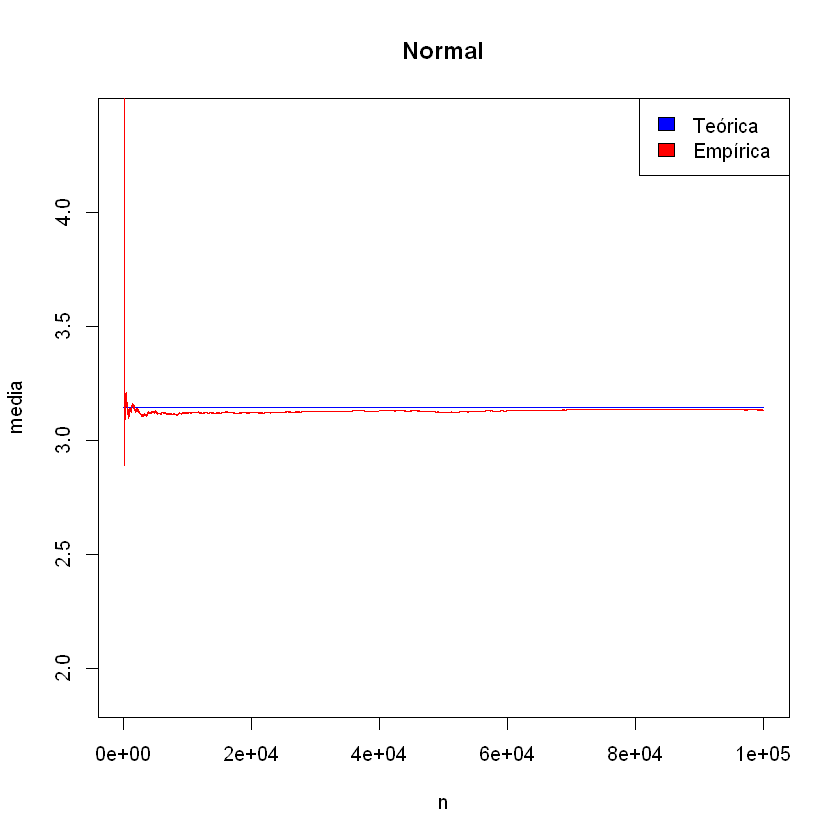

In [2]:
#gráfico comparativo
plot( df$i, df$mt,
main="Normal",
xlab="n",
ylab="media",
type="l",
col="blue")
lines(df$i, df$y, col="red")
legend("topright",
c("Teórica","Empírica"),
fill=c("blue","red")
)

## Observaciones:
La media de la distribución normal en este caso fue el numero pi, y se observa que, a partir de la muestra, cuando se obtiene el promedio de esta variando la cantidad observaciones y particularmente n tiende a ser más grande converge al valor de la media de la distribución normal, en este caso pi. Por lo tanto, con esta simulación se corrobora la ley de los grandes números.

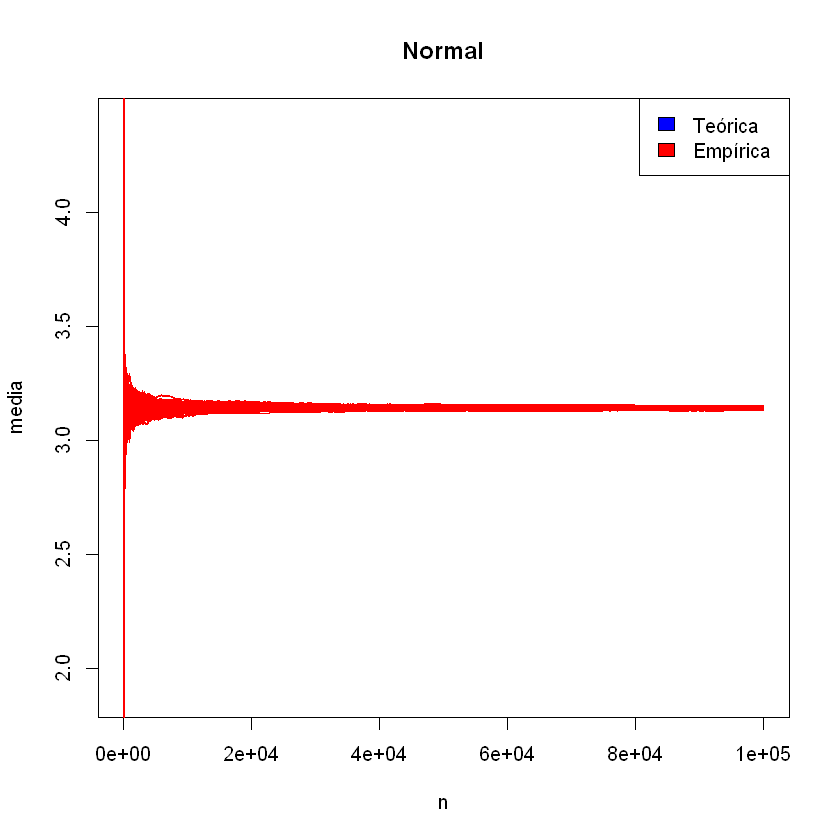

In [3]:
#c) se repite el procedimiento anterior 10 veces

ym<-function(m,x){#funcion para la media muestral variando el tamaño de la muestra
    y<-x[m]/m
}

n<-10^5 #numero de repeticiones en un proceso
i<-1:n #rango de aplicación
mt<-rep(pi,n) #media teorica

#gráfico comparativo
plot( i, mt,
main="Normal",
xlab="n",
ylab="media",
type="l",
col="blue")
legend("topright",
c("Teórica","Empírica"),
fill=c("blue","red")
)

pross<-function(r){#numero de repeticiones en un proceso
    j<-r
    medt<-pi #media de la normal
    vart<-2  #varianza de la normal
    dst<-sqrt(vart) #desviacion estandar de la normal
    n<-10^5 #numero de repeticiones en un proceso
    
    x<-rnorm(n,mean=medt,sd=dst) #muestra de la normal con los datos anteriores
    x<-cumsum(x)
    
    m<-n #tamaño de m para la funcion
    i<-1:m #rango de aplicación
    y<-sapply(i,ym,x=x) #se aplica la funcion anterior
    lines(i, y, col="red")
    return(y)
}
m<-100 #repeticiones
j<-1:m
fx2<-sapply(j,pross)  #se repite el procedimiento anterior 10 veces

## Observaciones:
Se observó que de las 100 repeticiones en todas para n muy pequeña varía mucho alrededor del valor de la media, sin embargo mientras mas va creciendo n, para todas converge al valor exacto.

In [4]:
# d) se repite b) y c) para la distribución cauchy

ym<-function(m,x){#funcion para la media muestral variando el tamaño de la muestra
    y<-x[m]/m
}

n<-10^5 #numero de repeticiones en un proceso
i<-1:n #rango de aplicación
mt<-rep(pi,n) #media teorica

pross<-function(r){#numero de repeticiones en un proceso
    j<-r
    l<-pi #parametros de la cauchy
    s<-sqrt(2) #
    n<-10^5 #numero de repeticiones en un proceso
    
    x<-rcauchy(n,location=l,scale=s) #muestra de la normal con los datos anteriores
    x<-cumsum(x)
    
    m<-n #tamaño de m para la funcion
    i<-1:m #rango de aplicación
    y<-sapply(i,ym,x=x) #se aplica la funcion anterior
    #lines(i, y, col="red")
    return(y)
}

In [5]:
m<-1 # repeticiones
j<-1:m
fc1<-sapply(j,pross)  #se repite el procedimiento anterior 1 veces

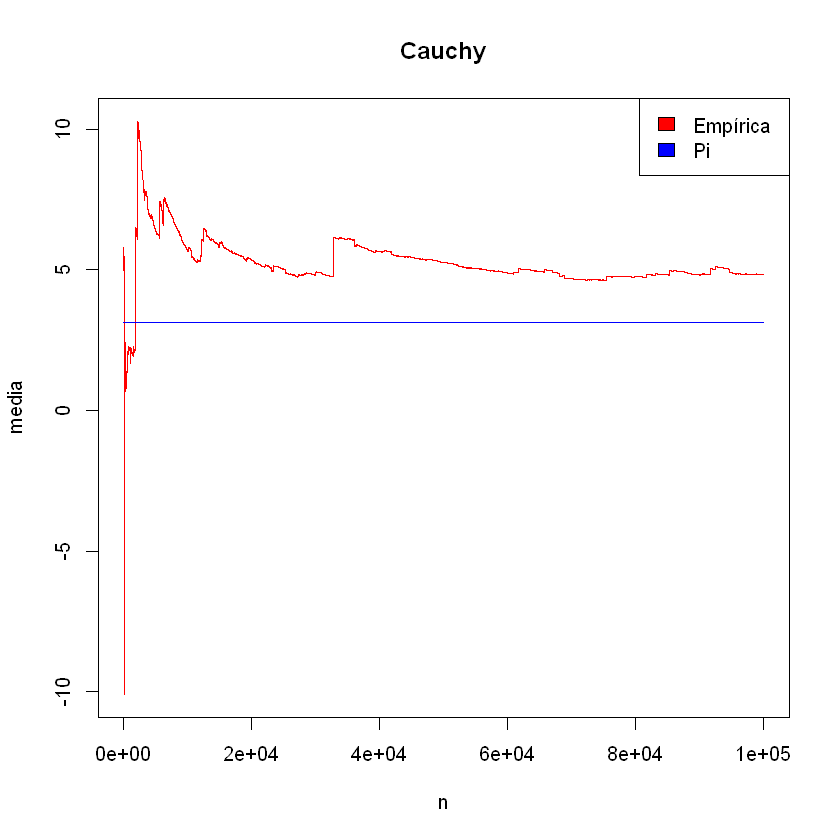

In [6]:
#gráfico comparativo
plot( i, fc1,
main="Cauchy",
xlab="n",
ylab="media",
type="l",
col="red")
legend("topright",
c("Empírica", "Pi"),
fill=c("red", "blue")
)
lines(i,mt, col="blue")

In [7]:
m<-100 # repeticiones
j<-1:m
fc2<-sapply(j,pross)  #se repite el procedimiento anterior 10 veces

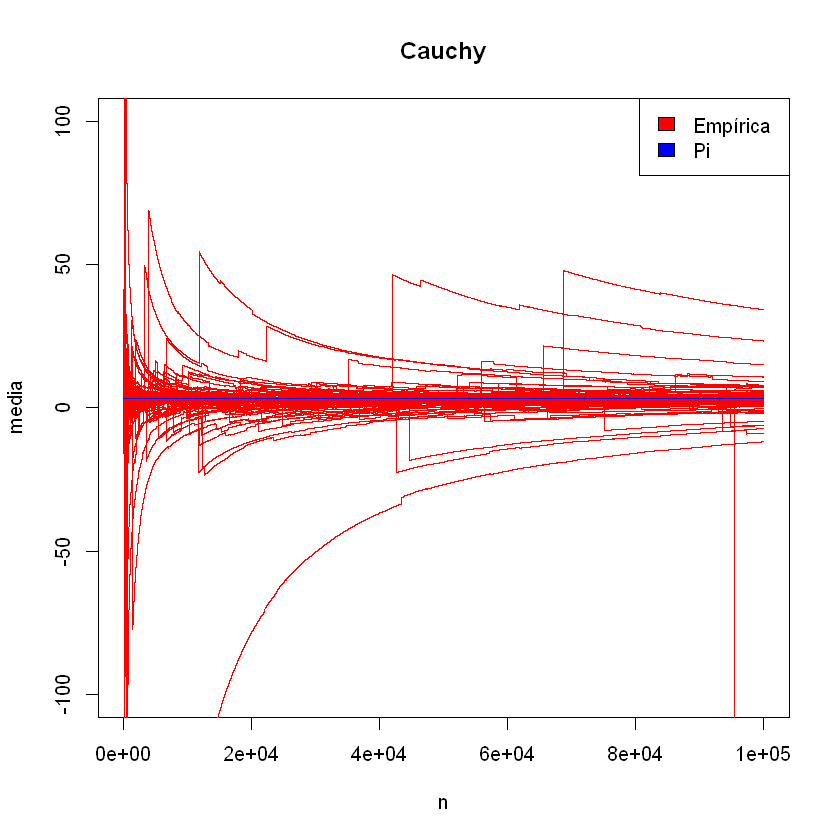

In [8]:
#gráfico comparativo
plot( i, fc2[,1],
main="Cauchy",
xlab="n",
ylab="media",
type="l",
col="red",
#xlim = c(0, 3),
ylim = c(-100, 100)  )
legend("topright",
c("Empírica", "Pi"),
fill=c("red", "blue")
)

gr<-function(i,x,y){
    lines(x, y[,i], col="red")
}

m<-100 # repeticiones
j<-2:m
fx2<-sapply(j,gr,x=i,y=fc2)  #se repite el procedimiento anterior 10 veces

lines(i,mt, col="blue")

## Observaciones:
Se observó que tanto para 1 repetición como para 100, no converge, se aproxima a veces a pi por arriba y otras por abajo, pero hay mucha variación aun para números grandes de n, entonces se podría concluir que para la distribución Cauchy su media no esta bien definida.

# Problema 3
b) y c)

In [33]:
#b)
#datos
alfa<-0.05
p<-0.4
n<-c(10,50,100,250,500,1000,2500,5000,10000)

f_epsilon<-function(alfa,n){#funcion para calcular epsilon
    ep<-sqrt((1/(2*n))*log(2/alfa))
}

epsilons<-f_epsilon(alfa,n) #vector de epsilons

In [89]:
li<-matrix(0,1,length(n))
pr<-matrix(p,1,length(n))
ls<-matrix(0,1,length(n))

for( i in 1:length(n)){
    x<-rbinom(n[i],1,p)
    medm<-mean(x)
    epsilon<-epsilons[i]
    li[i]<-ifelse(medm-epsilon<0, 0, medm-epsilon)
    ls[i]<-ifelse(medm+epsilon>1, 1, medm+epsilon)
    
}

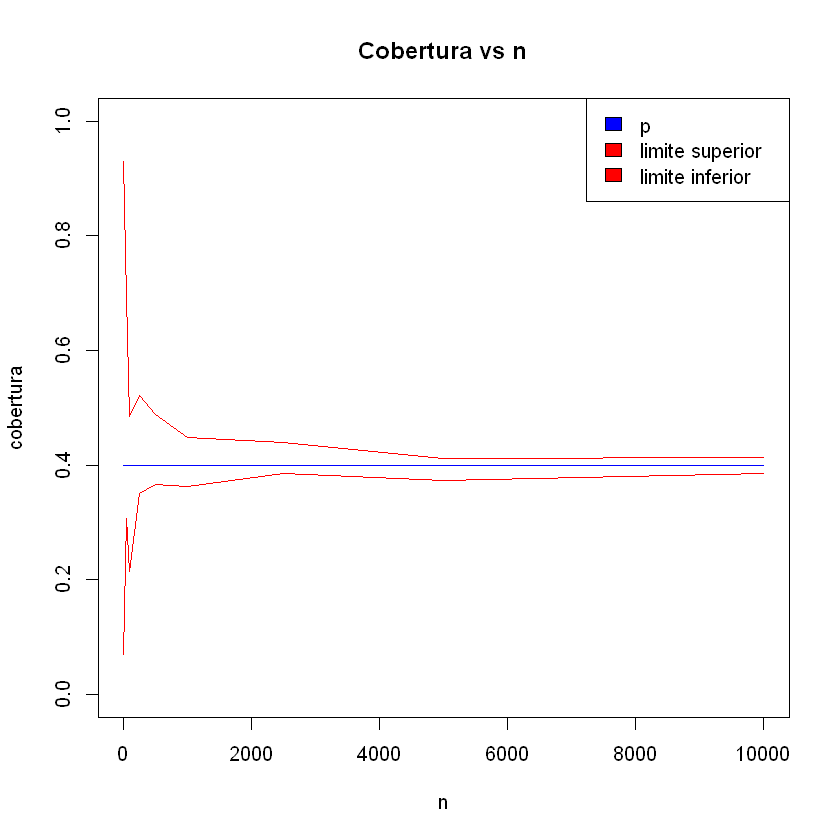

In [92]:
#gráfico comparativo
plot( n, pr,
main="Cobertura vs n",
xlab="n",
ylab="cobertura",
type="l",
col="blue",
ylim = c(0, 1)  )
lines(n, li, col="red")
lines(n, ls, col="red")
legend("topright",
c("p","limite superior", "limite inferior"),
fill=c("blue","red","red")
)

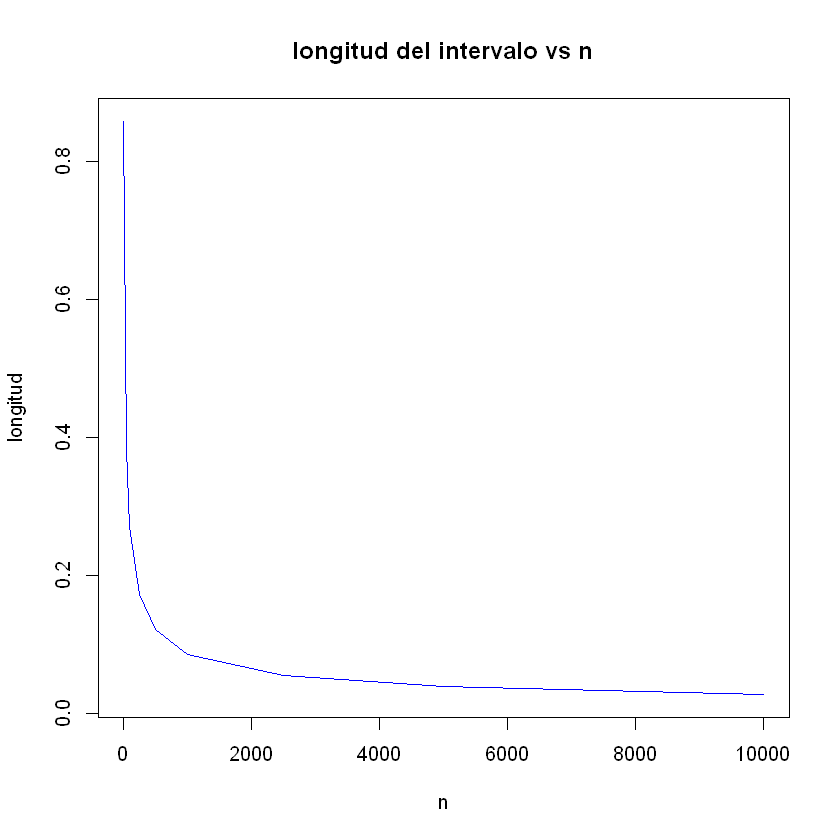

In [94]:
#c) longitud del intervalo
long<-ls-li

#gráfico
plot( n,long,
main="longitud del intervalo vs n",
xlab="n",
ylab="longitud",
type="l",
col="blue"
  )

Si se desea que la longitud sea menor a 0.05, n debe ser mayor o igual a: 5000

In [98]:
nv<-min(n[long<0.05])
nv

[1] 5000

## Observaciones:
Del gráfico de la cobertura se observa que mientras mas grande sea la muestra mejor acota el intervalo donde se encuentra el valor verdadero. También del grafico de la longitud se observa lo anterior para una muestra pequeña la longitud es grande mientras que para una muestra grande la longitud es pequeña. 

# Problema 5

In [4]:
#a)

#funcion de la distribucion empirica
em_f<-function(Datos,x){
    n<-length(Datos) #tamaño del conjunto de datos
    l<-Datos<=x 
    f<-sum(l)/n  
    return(f)
}

In [1]:
#datos
D<-c(23.37,25.05,23.02,21.87,20.4,17.32,24.41,21.05,30.74,21.27,28.83,26.73,23.33,22.9,17.22,15.2,18.0,22.81,24.21,17.55,20.78,27.52,25.92,23.17,15.48,23.64,21.60,27.19,28.96,22.37)


In [31]:
x<-seq(from=0,to=max(D)+10,by=1) #datos para probar la función
n<-length(x) #tamaño
f<-matrix(0,1,n) #inicia un vector para guardar resultados
for(i in 1:n ){ #aplica la funcion al conjunto x
    f[i]<-em_f(D,x[i])
}


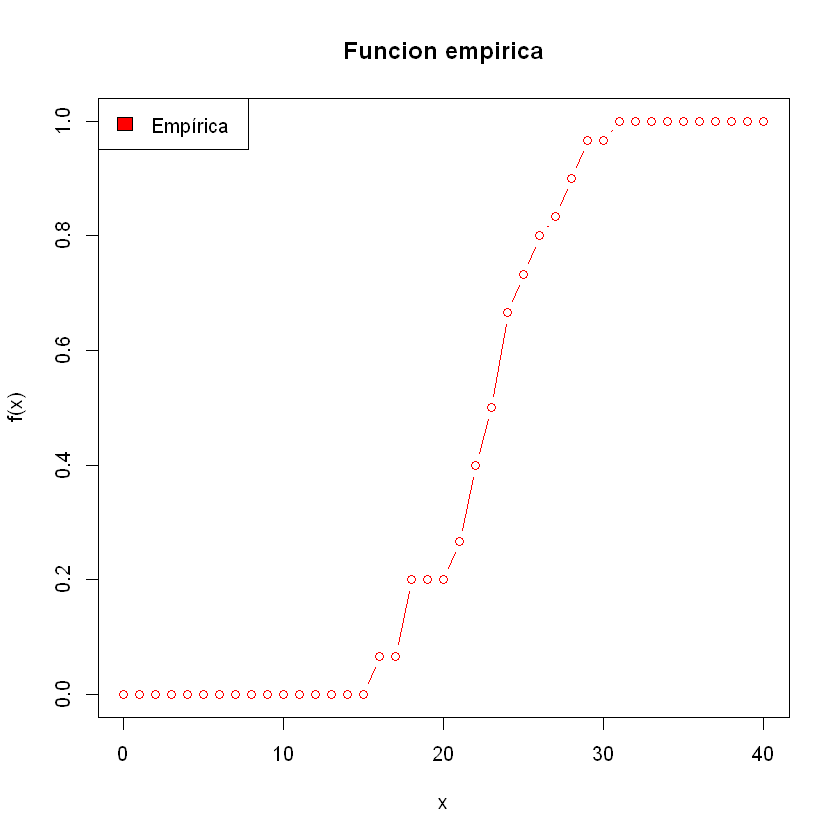

In [32]:
#gráfico comparativo
plot( x, f,
main="Funcion empirica",
xlab="x",
ylab="f(x)",
type="b",
col="red",
xlim = c(0, 40),
ylim = c(0, 1)  )
legend("topleft",
c("Empírica"),
fill=c("red")
)

## Observaciones:
Los saltos en la gráfica están asociados a aquellos puntos x que caen dentro de un rango en el conjunto de datos a los cuales se les asigna la misma probabilidad.

In [69]:
#b)
qq_n<-function(Datos){## funcion para crear los datos del qqplot de la normal
    dord<-sort(Datos) #ordena los datos
    n<-length(dord) #obtiene el tamaño
    i<-seq(from=1,to=n,by=1) #crea una secuencia de 1 al tamaño de los datos
    pi<-sapply(i,function(i){i/(n+1)}) #aplica la funcion al conjunto de datos i
    qi<-qnorm(pi,mean=0,sd=1) #obtiene los cuantiles de la normal estandar
    df<-data.frame(dord,i,pi,qi) #crea un data frame

    return(df)
    
}
df<-qq_n(D)

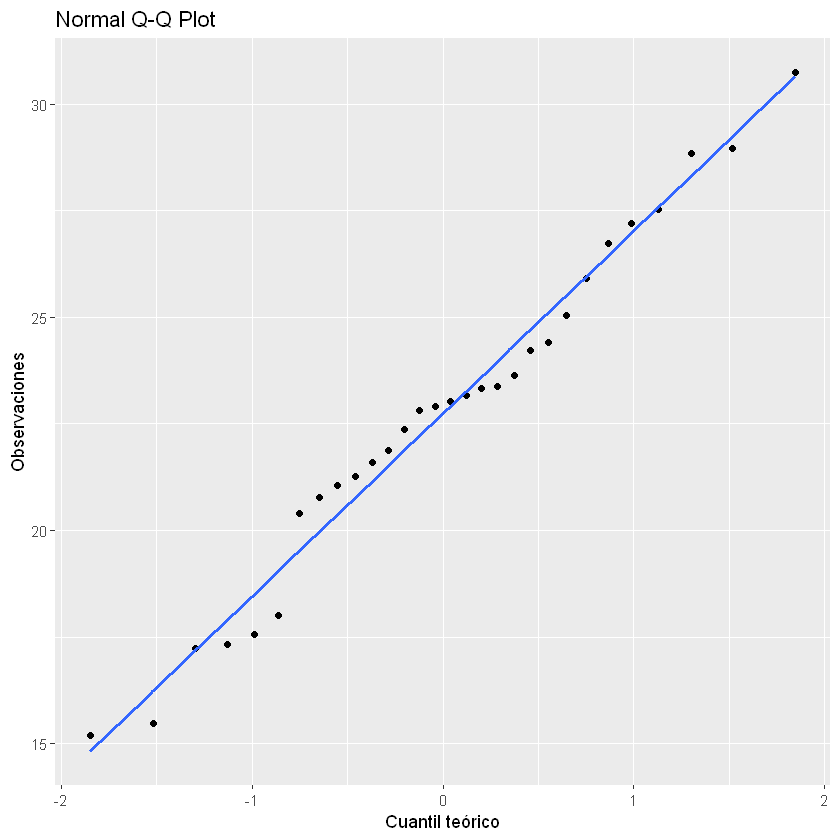

In [85]:
#para crear el grafico qqplot normal
ggplot(data=df,aes(y=dord, x=qi))+
        geom_point()+ #tipo de grafico
        ggtitle("Normal Q-Q Plot")+ #title
        xlab("Cuantil teórico") +# for the x axis label
        ylab("Observaciones")+ # for the y axis label
        geom_smooth(method="lm", se=FALSE) #ajuste lineal

## Observaciones:
Se observa que la mayoría de los datos se ajustan a una recta, por lo cual se podría considerar que si se ajusta a una normal, pero para estar seguro se necesitaría de ayuda de otros gráficos como el boxplot o el hisograma.

In [44]:
#c)
qq_n<-function(Datos,alfa){## funcion para crear los datos del qqplot de la normal con kolmogorov-smirnov para la normal
    dord<-sort(Datos) #ordena los datos
    n<-length(dord) #obtiene el tamaño
    
    i<-seq(from=1,to=n,by=1) #crea una secuencia de 1 al tamaño de los datos
    pi<-sapply(i,function(i){i/(n+1)}) #prob empirica
    qi<-qnorm(pi,mean=0,sd=1) #obtiene los cuantiles de la normal estandar
    
    #para calcular el punto critico de KS para la normal
    if(alfa==0.1){
        ca<-0.819
    }else if(alfa==0.05){
        ca<-0.895
    }else if(alfa==0.01){
        ca<-1.035
    }
    
    kn<-sqrt(n)-0.01+(0.85/sqrt(n))
    da<-ca/kn #punto critico de KS para la normal
 
    li<-ifelse(pi-da<0, 0.001, pi-da) #limite inferior (prob)
    li<-qnorm(li,mean=0,sd=1) #cuantil
    
    ls<-ifelse(pi+da>1, 0.999, pi+da) #limite superior (prob)
    ls<-qnorm(ls,mean=0,sd=1) #cuantil
    
    df<-data.frame(dord,i,pi,qi,li,ls) #crea un data frame

    return(df)
    
}

df2_alfa1<-qq_n(D,0.05) 
df2_alfa2<-qq_n(D,0.01)

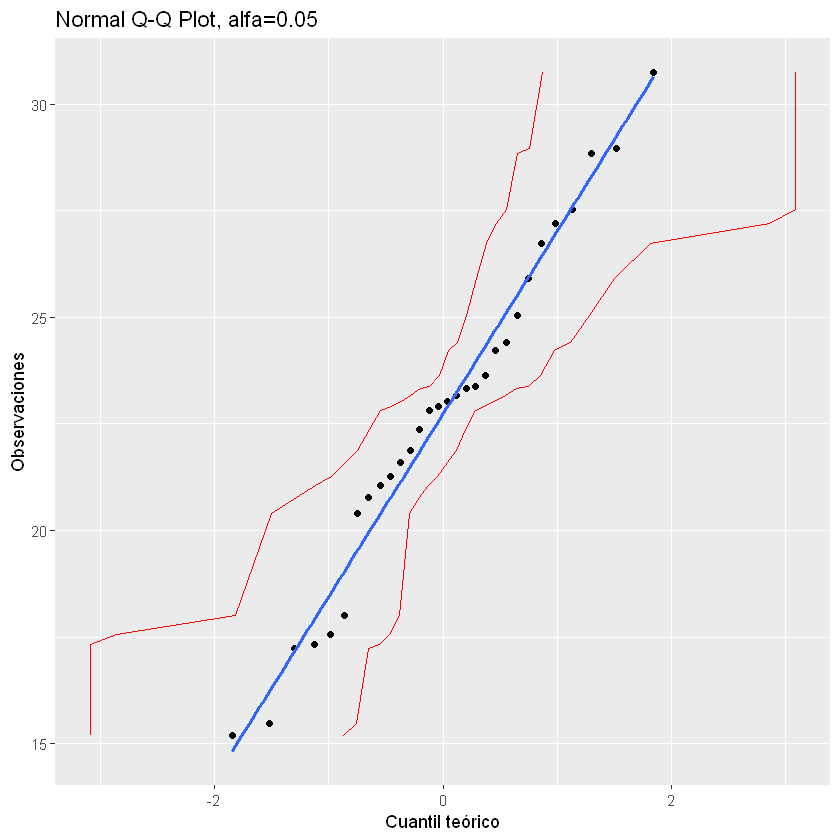

In [45]:
#para crear el grafico qqplot normal
ggplot(data=df2_alfa1,aes(y=dord, x=qi))+
geom_line(data=df2_alfa1,aes(y=dord, x=li), color="red")+
geom_line(data=df2_alfa1,aes(y=dord, x=ls), color="red")+
        geom_point()+ #tipo de grafico
        ggtitle("Normal Q-Q Plot, alfa=0.05")+ #title
        xlab("Cuantil teórico") +# for the x axis label
        ylab("Observaciones")+ # for the y axis label
        geom_smooth(method="lm", se=FALSE) #ajuste lineal

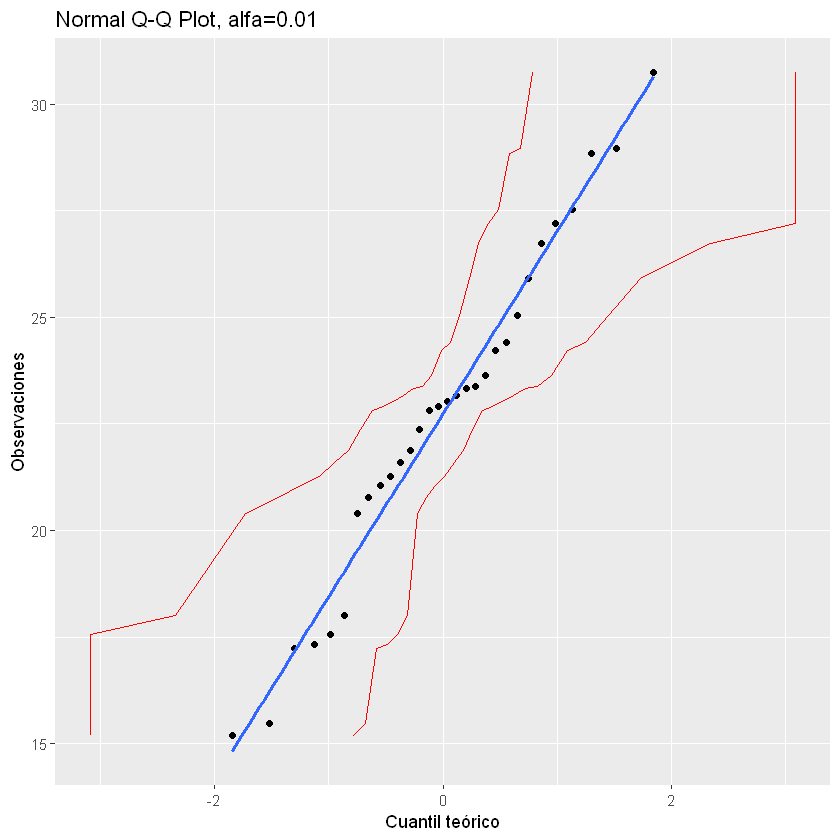

In [46]:
#para crear el grafico qqplot normal
ggplot(data=df2_alfa2,aes(y=dord, x=qi))+
geom_line(data=df2_alfa2,aes(y=dord, x=li), color="red")+
geom_line(data=df2_alfa2,aes(y=dord, x=ls), color="red")+
        geom_point()+ #tipo de grafico
        ggtitle("Normal Q-Q Plot, alfa=0.01")+ #title
        xlab("Cuantil teórico") +# for the x axis label
        ylab("Observaciones")+ # for the y axis label
        geom_smooth(method="lm", se=FALSE) #ajuste lineal

## Observaciones:
Se observa que la mayoría de los datos se ajustan a una recta y quedan dentro de las bandas de confianza, por lo cual se podría considerar que sí se ajusta a una normal, pero para estar seguro se necesitaría de ayuda de otros gráficos como el boxplot o el hisograma.

In [142]:
#d)
pp_n<-function(Datos){## funcion para crear los datos del qqplot de la normal con kolmogorov-smirnov para la normal
    dord<-sort(Datos) #ordena los datos
    meanm<-mean(dord)
    sdm<-sd(dord)
    n<-length(dord) #obtiene el tamaño
    i<-seq(from=1,to=n,by=1) #crea una secuencia de 1 al tamaño de los datos
    pi<-sapply(i,function(i){i/(n)}) #aplica la funcion al conjunto de datos i
    ft<-pnorm(dord,mean=meanm,sd=sdm)
    #ft<-pnorm(dord,mean=0,sd=1)
    df<-data.frame(dord,i,pi,ft) #crea un data frame

    return(df)
    
}

df2<-pp_n(D)

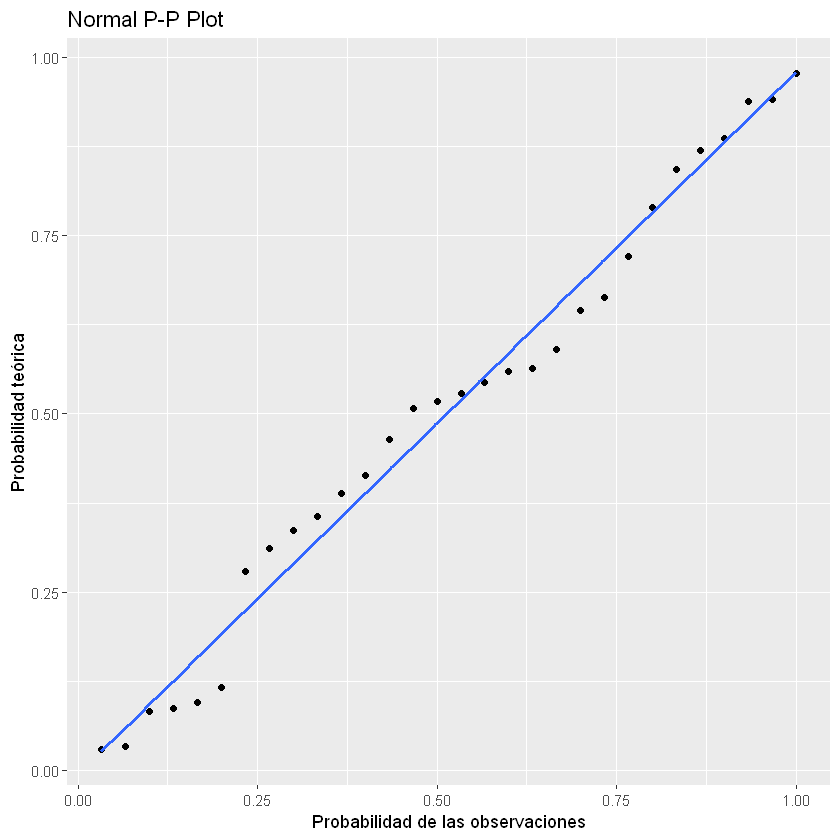

In [144]:
#para crear el grafico qqplot normal
ggplot(data=df2,aes(y=ft, x=pi))+
        geom_point()+ #tipo de grafico
        ggtitle("Normal P-P Plot")+ #title
        xlab("Probabilidad de las observaciones") +# for the x axis label
        ylab("Probabilidad teórica")+ # for the y axis label
        geom_smooth(method="lm", se=FALSE) #ajuste lineal

## Observaciones:
Se observa que la mayoría de los datos se ajustan a una recta, por lo cual se podría considerar que si se ajusta a una normal, pero para estar seguro se necesitaría de ayuda de otros gráficos como el boxplot o el hisograma.

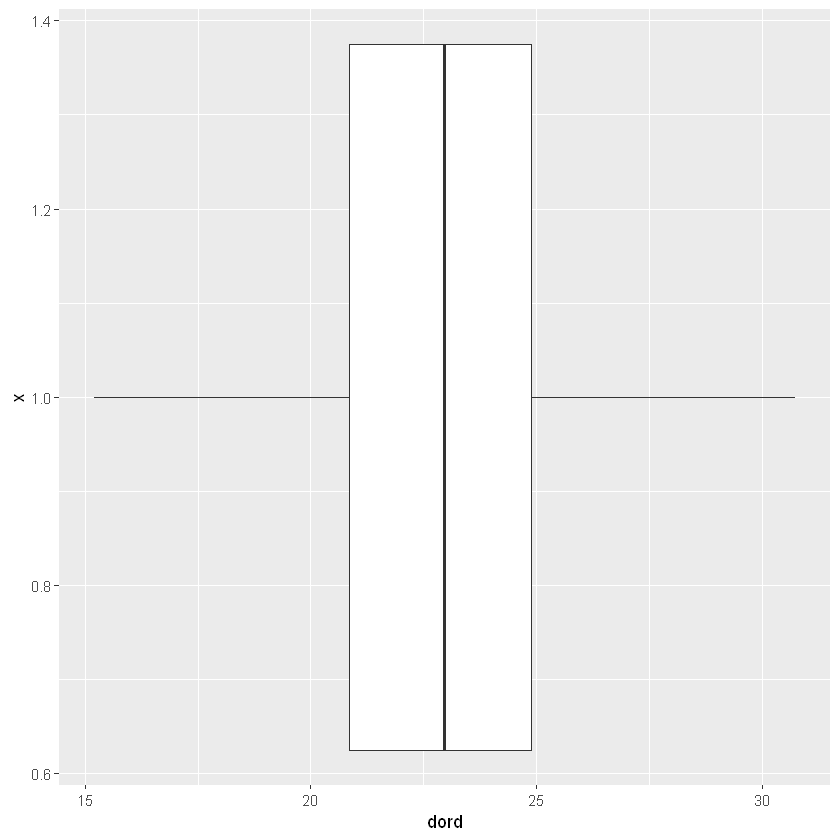

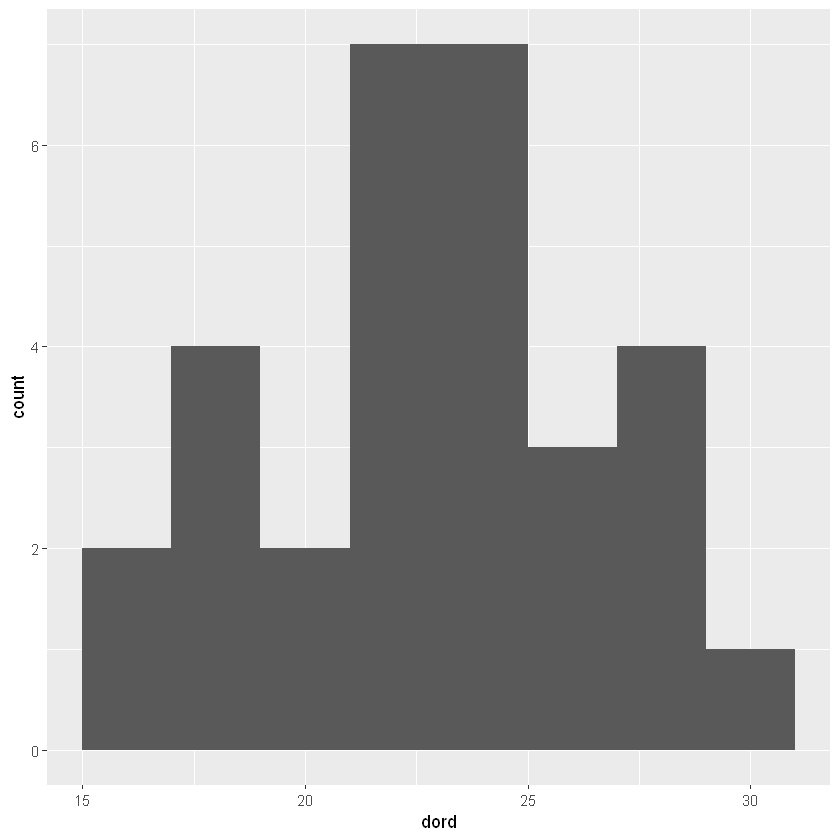

In [155]:
#e) con ayuda de histograma y boxplot para concluir
ggplot(data=df,aes(x=1,y=dord))+
    geom_boxplot()+
    coord_flip()

ggplot(data=df,aes(x=dord))+
    geom_histogram(binwidth=2)

## Conclusiones
Tanto en el QQ plot como en el PP plot de la normal, los datos se ajustan a una línea recta y caen dentro de las bandas de confianza, y con ayuda del histograma se puede observar simetría, al igual con el boxplot ya que se encuentra centrado y con simetría. Por lo tanto, los datos si ajustan a una distribución normal.

# Problema 6

In [186]:
#a)
fkernerl_gauss<-function(x){#funcion del kernel gaussiano
    k<-(1/sqrt(2*pi))*exp(-(1/2)*(x^2))
}

festimacion_kernel<-function(x,h,Datos){#funcion para estimar usando un kernel, en este caso el gaussiano
    dord<-sort(Datos) #ordena los datos
    n<-length(dord) #obtiene el tamaño
    cte<-1/(n*h) #termino constante de la formula
    par<-(x-dord)/h #vector con los parametros para el kernel
    k<-fkernerl_gauss(par) #vector de kernels
    suma<-sum(k) #sumatoria de los kernels
    f<-cte*suma 
}

In [202]:
#b)
#datos
h<-c(20,30,60) #parametro de suavidad
df<-read.csv("Tratamiento.csv",header=TRUE) #datos
datos<-df$X1
datos_ordenados<-sort(datos) #se ordenan los datos
n<-length(datos_ordenados) #tamaño de los datos
s<-sd(datos_ordenados) #desviacion estandar
hopt<-1.06*s*(n^(-1/5)) #h optimo

x<-seq(from=0,to=800,length=n) #rango de datos para aplicar la funcion

#aplicando la funcion
v1<-sapply(x,festimacion_kernel,h=h[1],Datos=datos_ordenados)
v2<-sapply(x,festimacion_kernel,h=h[2],Datos=datos_ordenados)
v3<-sapply(x,festimacion_kernel,h=h[3],Datos=datos_ordenados)
v4<-sapply(x,festimacion_kernel,h=hopt,Datos=datos_ordenados)
dff<-data.frame(x,v1,v2,v3,v4,datos_ordenados)

In [203]:
hopt #h optimo

[1] 64.08758

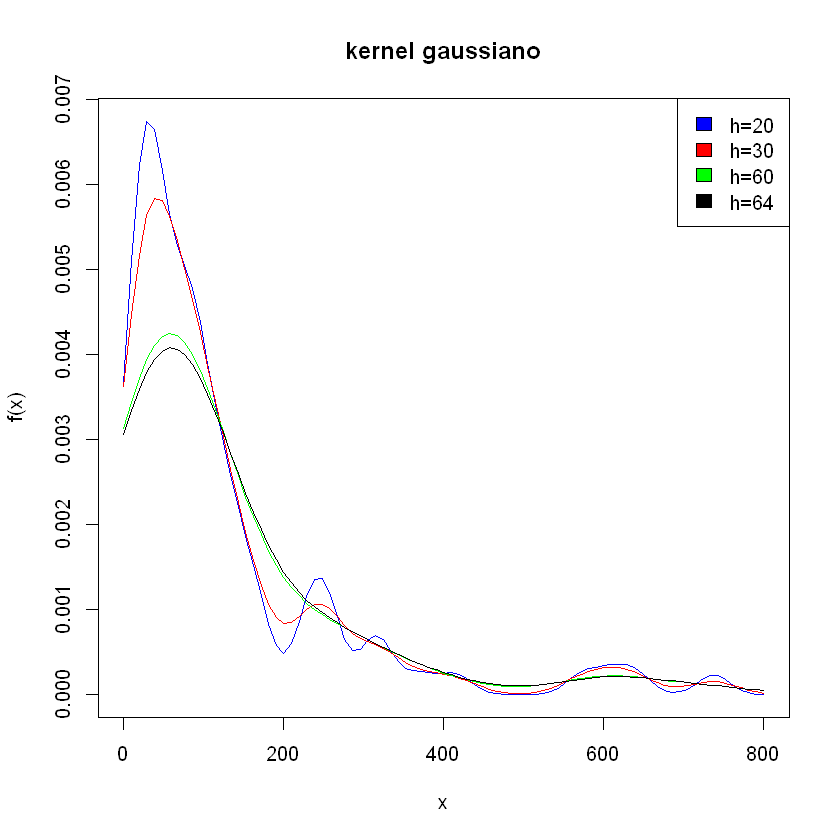

In [204]:
#gráfico
plot( x, v1,
main="kernel gaussiano",
xlab="x",
ylab="f(x)",
type="l",
col="blue"
#ylim = c(0, 1)
    )
lines(x, v2, col="red")
lines(x, v3, col="green")
lines(x, v4, col="black")


legend("topright",
c("h=20","h=30", "h=60","h=64"),
fill=c("blue","red","green","black")
)

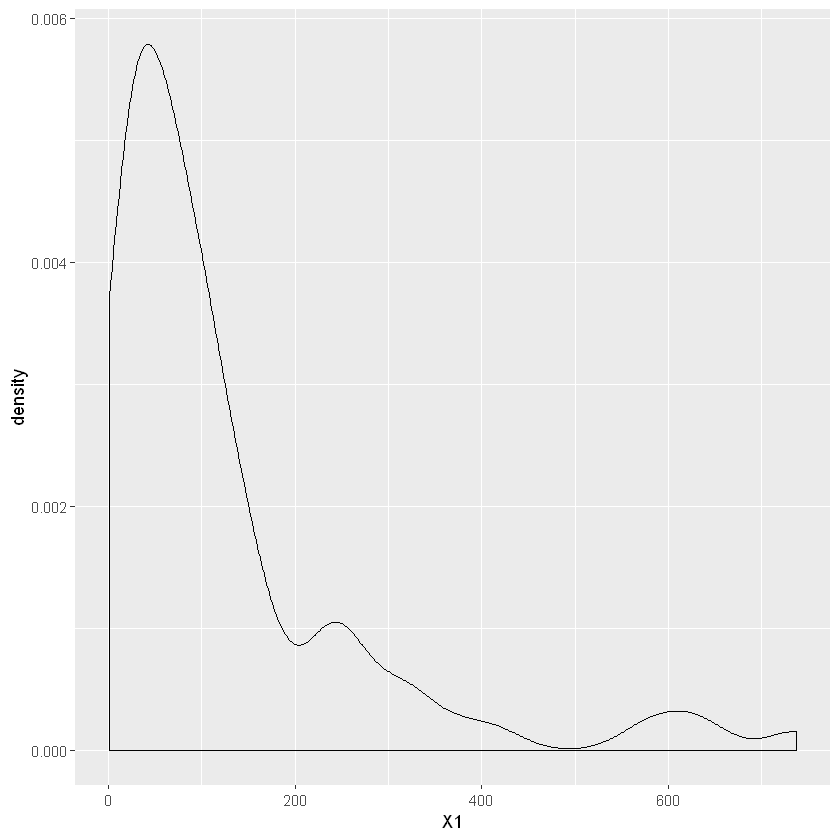

In [215]:
#grafico de densidad de los datos
ggplot(data=Tratamiento, aes(x=X1))+
    geom_density()

## Conclusiones
Si se compara el gráfico de densidad de los datos contra las diferentes estimaciones, la que mejor se aproxima es la que tiene el parámetro de suavidad de h=30, captura mejor la forma del gráfico de densidad, mientras que por otro lado con la formula para obtener el parámetro de suavidad optimo h=64, es como un promedio de las otras ya que se ve suavizada. Observando la tabla de frecuencias de los datos, en mi opinión, el mejor estimador, es el que se obtiene con la formula para obtener el óptimo h=64, ya que considero representa mejor las frecuencias de los datos, donde en la parte izquierda es donde se tiene la mayor concentración y en la parte derecha la menor y de forma suavizada.

# Problema 7

In [2]:
#a)
dfMaiz<-read.csv("Maiz.csv",header=TRUE) #datos

In [233]:
#con funciones de r
mod<-lm(P..Tonelada.Tortilla~P..Tonelada.Maíz,data=dfMaiz) #modelo lineal
coef(mod) #obtener los coeficientes del modelo

x<-dfMaiz$P..Tonelada.Maíz
y<-dfMaiz$P..Tonelada.Tortilla

cor(x,y) #coef de pearson

(Intercept) P..Tonelada.Maíz 
     684.9545215        0.4600343

[1] 0.7975325

In [5]:
my_reglin<-function(x,y){ #funcion para método de minimos cuadrados
    n<-length(x) #tamañp
    yb<-mean(y) #medias de y y x
    xb<-mean(x)
    
    xy<-x*y 
    xy<-sum(xy)
    xs<-sum(x)
    ys<-sum(y)
    
    xx<-x*x
    xx<-sum(xx)
    
    yy<-y*y
    yy<-sum(yy)
    
    xs2<-xs^2
    ys2<-ys^2
    
    m<-((n*xy)-(xs*ys))/((n*xx)-xs2) #pendiente
    b<-yb-(m*xb) #y intercept
    r<-((n*xy)-(xs*ys))/(sqrt((n*xx)-xs2)*sqrt((n*yy)-ys2)) #pearson
    re<-list(m,b,r)
    return(re)
}
x<-dfMaiz$P..Tonelada.Maíz
y<-dfMaiz$P..Tonelada.Tortilla
my_reglin(x,y)

[[1]]
[1] 0.4600343

[[2]]
[1] 684.9545

[[3]]
[1] 0.7975325

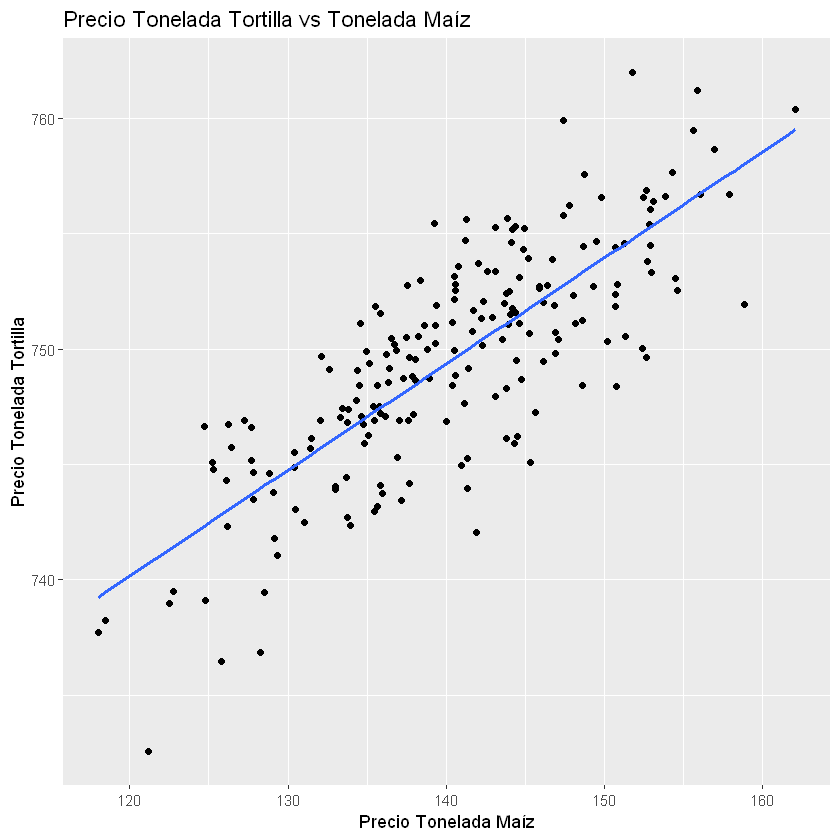

In [237]:
#gráfico con regresion lineal
ggplot(data=dfMaiz,aes(y=P..Tonelada.Tortilla, x=P..Tonelada.Maíz))+
        geom_point()+ #tipo de grafico
        ggtitle("Precio Tonelada Tortilla vs Tonelada Maíz")+ #title
        xlab("Precio Tonelada Maíz") +# for the x axis label
        ylab("Precio Tonelada Tortilla")+ # for the y axis label
        geom_smooth(method="lm", se=FALSE) #ajuste lineal

## Conclusiones
Se observa que el coeficiente de Pearson r, es ligeramente mayor al 75% y aunque hay varianza alrededor de la línea, se puede notar una tendencia lineal positiva. Por lo tanto, los datos muestran una correlación fuerte, lineal positiva. En otras palabras, que el precio de la tortilla podría estar influenciado por el precio del maíz, a mayor costo de la materia prima, mayor costo del producto.

In [6]:
#b)
fkernerl_gauss<-function(x){#funcion del kernel gaussiano
    k<-(1/sqrt(2*pi))*exp(-(1/2)*(x^2))
}

freg_kernel<-function(x,h,Datosx,Datosy){#funcion para estimar usando un kernel, en este caso el gaussiano
    dordx<-sort(Datosx) #ordena los datos
    dordy<-sort(Datosy) #ordena los datos
    n<-length(dordx) #obtiene el tamaño
    cte<-1/(n*h) #termino constante de la formula
    par<-(x-dordx)*cte #vector con los parametros para el kernel
    k<-fkernerl_gauss(par) #vector de kernels
    k2<-dordy*k
    suma1<-sum(k2)
    suma2<-sum(k) #sumatoria de los kernels
    
    f<-suma1/suma2 
}

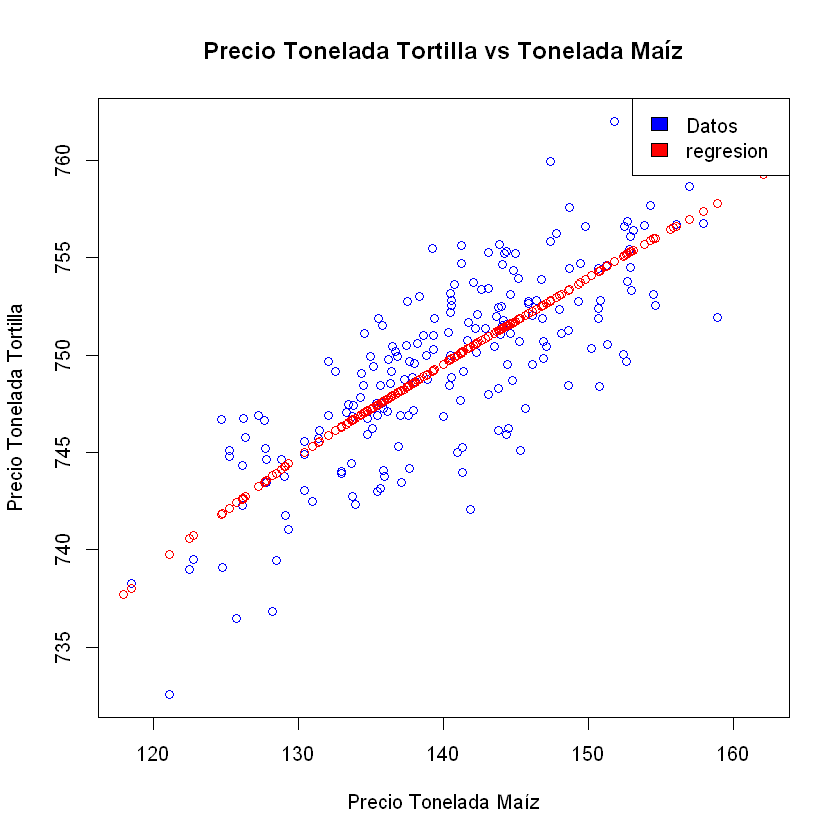

In [28]:
Datosx<-dfMaiz$P..Tonelada.Maíz
Datosy<-dfMaiz$P..Tonelada.Tortilla

vr<-sapply(Datosx,freg_kernel,0.02,Datosx=Datosx,Datosy=Datosy)

#gráfico
plot( Datosx, Datosy,
main="Precio Tonelada Tortilla vs Tonelada Maíz",
xlab="Precio Tonelada Maíz",
ylab="Precio Tonelada Tortilla",
type="p",
col="blue"
#ylim = c(0, 1)
    )
points(Datosx, vr, col="red")



legend("topright",
c("Datos","regresion"),
fill=c("blue","red")
)

## Conclusiones
De este tipo de correlación se observa que está fuertemente ligado  al parámetro de suavidad h, mientras mas grande sea, tiende a ser una línea horizontal y mientras mas pequeño va rotando a la izquierda con lo que se logra ajustar a los datos.

## c) Conclusiones:
Para una regresión lineal, creo que el método optimo es por mínimos cuadrados, por su simplicidad de implementación además de que se obtienen los parámetros que mejor se ajustan a los datos, por el otro método hay que variar mucho la h para obtener un modelo que se ajuste.